<a href="https://colab.research.google.com/github/MercyMoparthy/project-nlp-challenge/blob/main/NLPModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project NLP Challenge

In this Project, we will find a dataset containing news articles with the following columns:
* label: 0 if the news is fake, 1 if the news is real.
* text: The category or topic of the news.

Our goal is to build a classifier that is able to distinguish between the two.

## 1. SetUp the Environment

In [93]:
!pip install nltk scikit-learn pandas matplotlib

In [94]:
# import required libraries
import nltk
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Read the datafile

In [95]:
data = pd.read_csv('data/training_data_lowercase.csv')
data.head()

,0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0,0\tdrunk bragging trump staffer started russia...
1,0\tsheriff david clarke becomes an internet jo...
2,0\ttrump is so obsessed he even has obama‚s na...
3,0\tpope francis just called out donald trump d...
4,0\tracist alabama cops brutalize black boy whi...


## 2. Text Preprocessing

2.1 Tokenization and Stop Word Removal

In [96]:
# Tokenization
# Displaying the Tokenization for first 5 rows
tokenized_text = data.iloc[:, 0].apply(word_tokenize)
for tokens in tokenized_text.head():
    print(tokens)

['0', 'drunk', 'bragging', 'trump', 'staffer', 'started', 'russian', 'collusion', 'investigation']
['0', 'sheriff', 'david', 'clarke', 'becomes', 'an', 'internet', 'joke', 'for', 'threatening', 'to', 'poke', 'people', '‚in', 'the', 'eye‚']
['0', 'trump', 'is', 'so', 'obsessed', 'he', 'even', 'has', 'obama‚s', 'name', 'coded', 'into', 'his', 'website', '(', 'images', ')']
['0', 'pope', 'francis', 'just', 'called', 'out', 'donald', 'trump', 'during', 'his', 'christmas', 'speech']
['0', 'racist', 'alabama', 'cops', 'brutalize', 'black', 'boy', 'while', 'he', 'is', 'in', 'handcuffs', '(', 'graphic', 'images', ')']


In [97]:
# StopWord Removal
stop_words = set(stopwords.words('english'))
stopword_text = [[word for word in text if word.lower() not in stop_words] for text in tokenized_text]    
#for text in stopword_text:
    #print(text)

2.2 Stemming and Lemmatization

In [98]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# Stemming
stemmed_tokens = [[stemmer.stem(word) for word in text] for text in stopword_text]
# Lemmatizing
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in doc] for doc in stopword_text]

2.3 Spliting data as label and text

In [99]:
# Read as tab-separated values
data = pd.read_csv('data/training_data_lowercase.csv', sep='\t', header=None, names=['label', 'text'])

# Convert label to integer
data['label'] = data['label'].astype(int)

# Check the result
print(data.head())

   label                                               text
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


2.3 Remove Punctuations and Digits in text column

In [100]:
import string

# Function to remove punctuation and numbers from a string
def clean_text(text):
    return ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

# Apply the function to the 'text' column
data['text'] = data['text'].apply(clean_text)

# Check the result
print(data.head())

   label                                               text
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


2.4 Remove All the Special Characters

In [101]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

data['clean_text'] = data['text'].apply(remove_special_characters)
print(data['clean_text'])

0        donald trump sends out embarrassing new years ...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes an internet joke ...
3        trump is so obsessed he even has obamas name c...
4        pope francis just called out donald trump duri...
                               ...                        
34147    tears in rain as thais gather for late kings f...
34148    pyongyang university needs nonus teachers as t...
34149    philippine president duterte to visit japan ah...
34150    japans abe may have won election\tbut many don...
34151    demoralized and divided inside catalonias poli...
Name: clean_text, Length: 34152, dtype: object


2.5 Remove all Single Characters

In [102]:
def remove_single_characters(text):
    # Remove single characters surrounded by spaces
    return re.sub(r'\b\w\b', '', text)

data['clean_text'] = data['clean_text'].apply(remove_single_characters)
print(data['clean_text'])

0        donald trump sends out embarrassing new years ...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes an internet joke ...
3        trump is so obsessed he even has obamas name c...
4        pope francis just called out donald trump duri...
                               ...                        
34147    tears in rain as thais gather for late kings f...
34148    pyongyang university needs nonus teachers as t...
34149    philippine president duterte to visit japan ah...
34150    japans abe may have won election\tbut many don...
34151    demoralized and divided inside catalonias poli...
Name: clean_text, Length: 34152, dtype: object


Class Distribution

C:\Users\Mercy\AppData\Local\Temp\ipykernel_3528\3775043527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette=bar_colors)


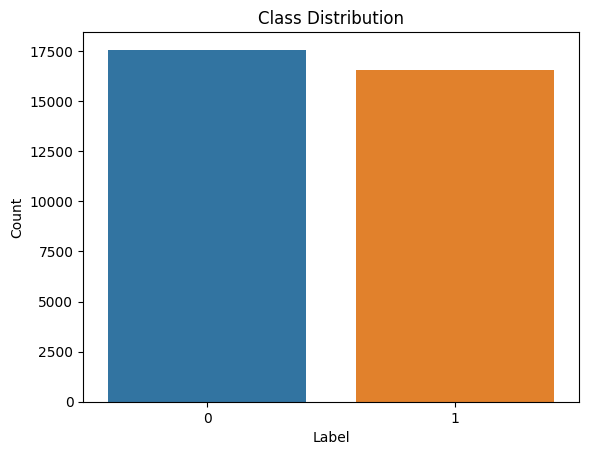

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
bar_colors = ['#1f77b4', '#ff7f0e']
sns.countplot(x='label', data=data, palette=bar_colors)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Top Words per Frequency

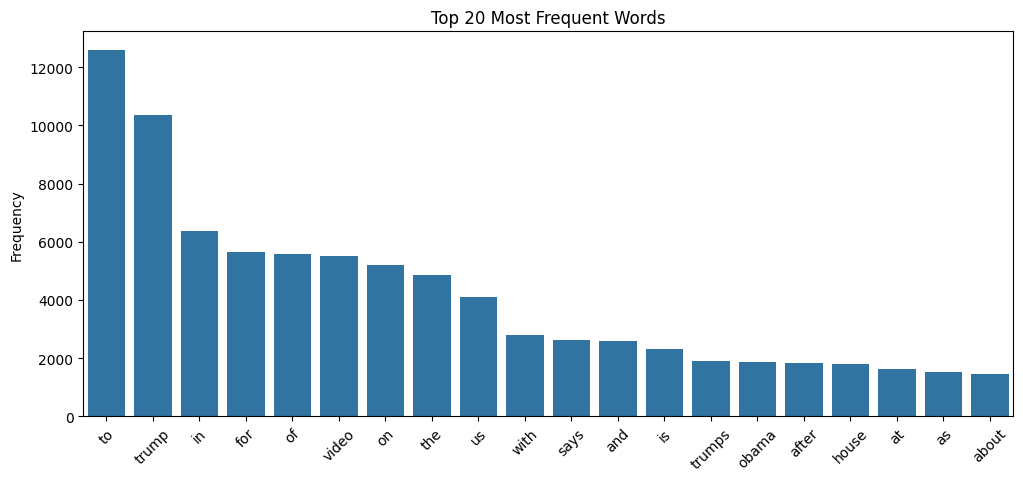

In [104]:
from collections import Counter

all_words = ' '.join(data['clean_text']).split()
freq_dist = Counter(all_words)
common_words = freq_dist.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.ylabel('Frequency')
plt.show()

Document Length Distribution

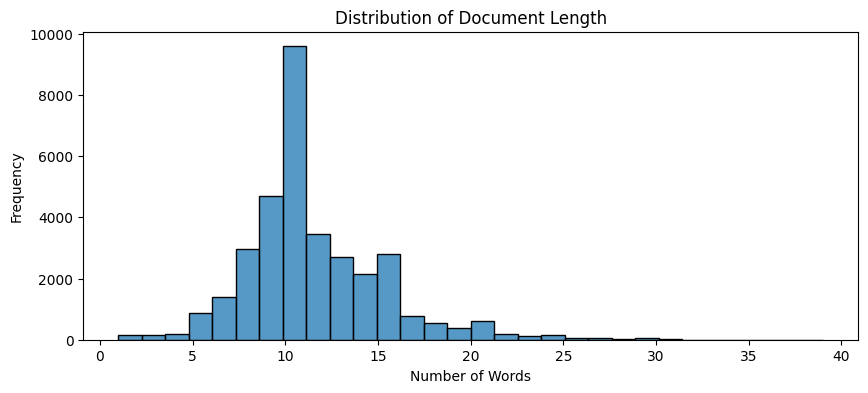

In [105]:
data['doc_length'] = data['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 4))
sns.histplot(data['doc_length'], bins=30)
plt.title('Distribution of Document Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## 2. Feature Extraction

Create a TF-IDF Representation

In [106]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b')
x_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# x_tfidf is a sparse matrix of TF-IDF features
print(x_tfidf.shape) 
print("TF-IDF Representation:\n", x_tfidf.toarray())

(34152, 20038)
TF-IDF Representation:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TF-IDF Vector Projection

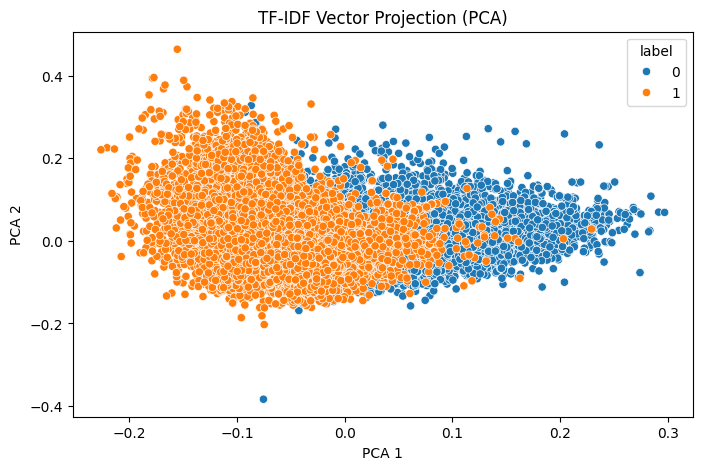

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['label'], palette='tab10')
plt.title('TF-IDF Vector Projection (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Most Important TF-IDF Features

In [108]:
import numpy as np

feature_names = tfidf_vectorizer.get_feature_names_out()
coefs = clf.coef_[0]
top_positive = np.argsort(coefs)[-10:]
top_negative = np.argsort(coefs)[:10]

print("Top positive features:")
print([feature_names[i] for i in top_positive])

print("\nTop negative features:")
print([feature_names[i] for i in top_negative])

Top positive features:
['senate', 'urges', 'pm', 'china', 'talks', 'house', 'factbox', 'trumps', 'us', 'says']

Top negative features:
['video', 's', 'breaking', 'the', 'hillary', 'gop', 'just', 't', 'his', 'is']


## 3. Train a Classifier

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare features and labels
X = x_tfidf
y = data['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.949787732396428
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3529
           1       0.93      0.96      0.95      3302

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



Classification Report/ HeatMap

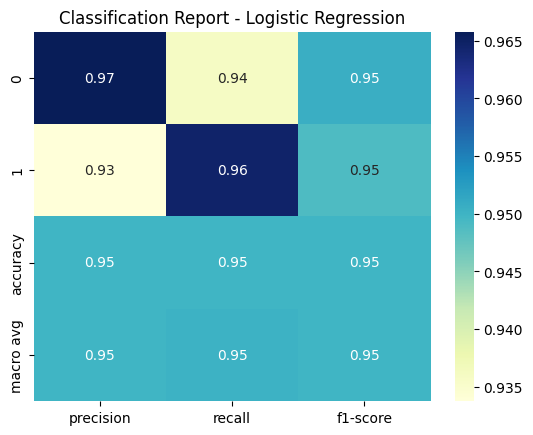

In [110]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report - Logistic Regression')
plt.show()

Confusion Matrix

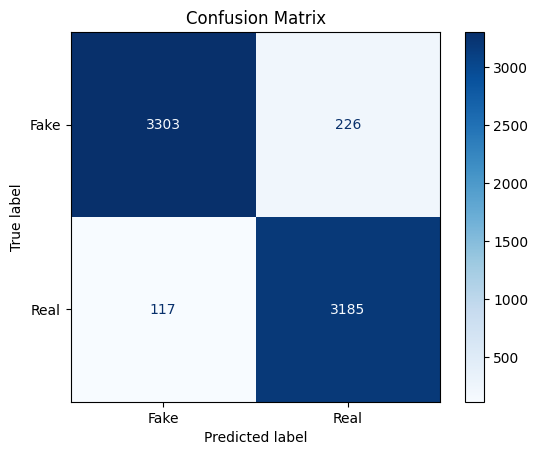

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the actual labels from new_data
true_labels = data['label']
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 4. Model Evaluation

4.1 Preprocess data

In [112]:
new_data = pd.read_csv('Data/testing_data_lowercase_nolabels.csv')

In [113]:
# Rename the column to 'text' for consistency
new_data.columns = ['text']
# tokenization
newdata_text = new_data['text'].apply(word_tokenize)
# stopword
newstop_words = set(stopwords.words('english'))
newstopword_text = [[word for word in text if word.lower() not in stop_words] for text in newdata_text]
# Stemming
stemmed_tokens = [[stemmer.stem(word) for word in text] for text in newstopword_text]
# Lemmatizing
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in doc] for doc in newstopword_text]
# punctuation
def clean_text(text):
    return ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
new_data['text'] = new_data['text'].apply(clean_text)

In [114]:
# Remove Special Characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

new_data['clean_text'] = new_data['text'].apply(remove_special_characters)

In [115]:
# Remove Single characters
def remove_single_characters(text):
    # Remove single characters surrounded by spaces
    return re.sub(r'\b\w\b', '', text)

new_data['clean_text'] = new_data['clean_text'].apply(remove_single_characters)

In [119]:
# Transform using the fitted TF-IDF vectorizer
X_new = tfidf_vectorizer.transform(new_data['text'])

# Predict labels
predicted_labels = clf.predict(X_new)
print("Predicted labels:", predicted_labels)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Predicted labels: [0 0 0 ... 1 0 0]
Accuracy: 0.949787732396428
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3529
           1       0.93      0.96      0.95      3302

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



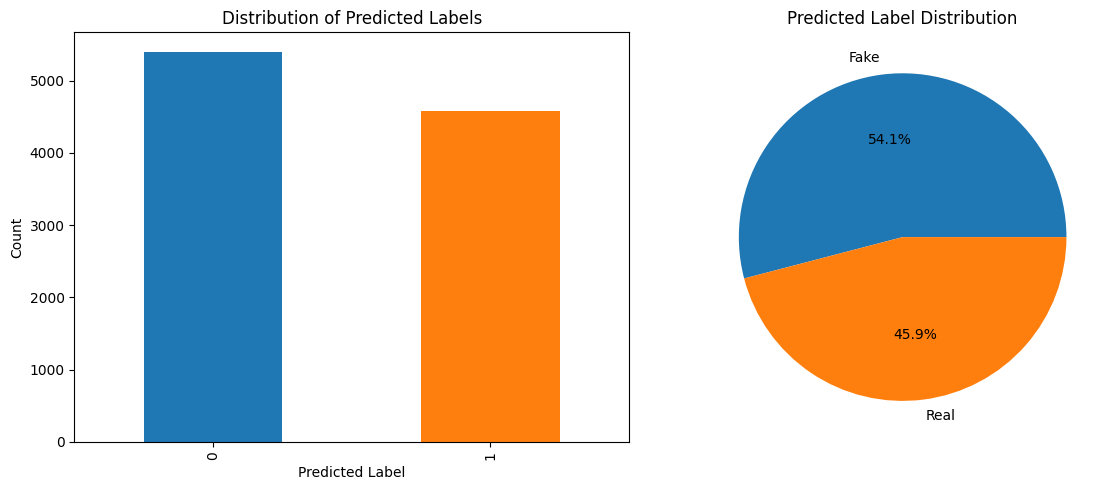

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert predictions to Series
pred_series = pd.Series(predicted_labels)

# Define custom colors for the bar chart
bar_colors = ['#1f77b4', '#ff7f0e']  # Example: blue for 0, orange for 1

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
pred_series.value_counts().sort_index().plot(
    kind='bar',
    color=bar_colors,
    ax=axes[0]
)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Predicted Labels')

# Pie chart
pred_series.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['Fake', 'Real'],
    colors=bar_colors,
    ax=axes[1]
)
axes[1].set_title('Predicted Label Distribution')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Most Frequest words in the testing data

In [ ]:
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()

Top Words by Frequency

In [ ]:
from collections import Counter

all_words = ' '.join(new_data['text']).split()
freq_dist = Counter(all_words)
common_words = freq_dist.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.ylabel('Frequency')
plt.show()